In [3]:
import numpy as np

# 좌표값 랜덥 생성
num_points = 1000
vectors_set = []

for i in range(num_points):
    x1 = np.random.normal(0.0,0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1,y1])
    
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]


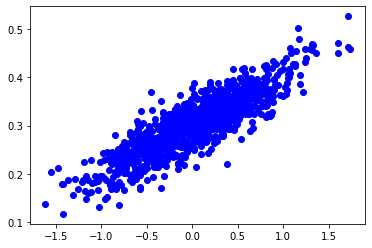

In [5]:
# 그래프로 표현
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'bo')
plt.show()

In [10]:
# y_data = W * x_data + b 라고 가정할 때
# W 와 b 찾기

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

W = tf.Variable(tf.random.uniform([1],-1.0,1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# cost function 정의 - 얼마나 좋은 함수인지 검증하기 위해
loss = tf.reduce_mean(tf.square(y-y_data))

# optimizer 정의 - 좋은 함수로 찾아가기 위해 
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)


Instructions for updating:
non-resource variables are not supported in the long term


[-0.09415412] [0.30486155]


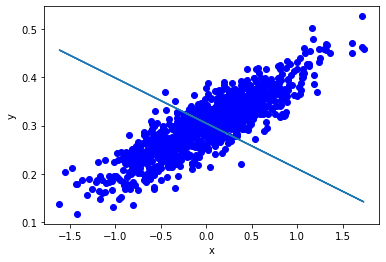

[-0.03756027] [0.3033142]


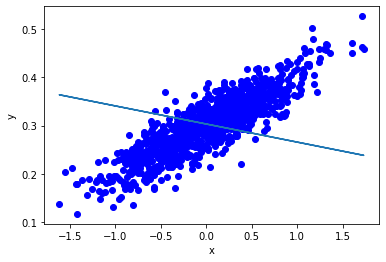

[0.0024058] [0.3023169]


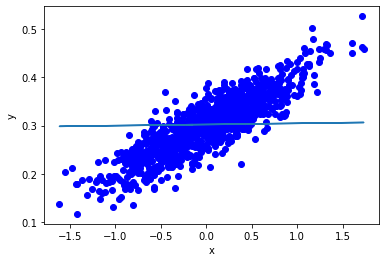

[0.03062781] [0.30161262]


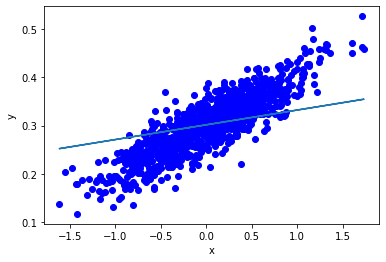

[0.05055676] [0.30111527]


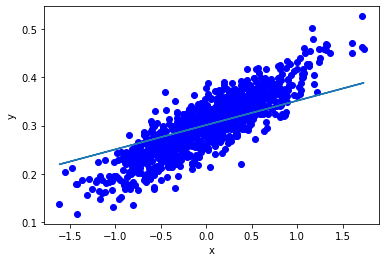

[0.06462956] [0.30076408]


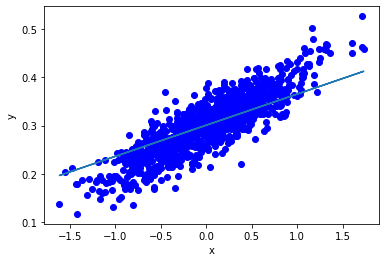

[0.07456706] [0.3005161]


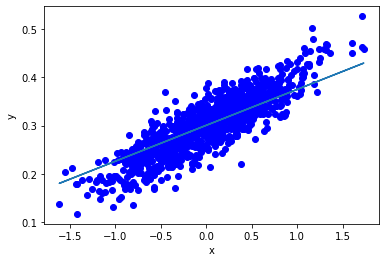

[0.08158442] [0.30034098]


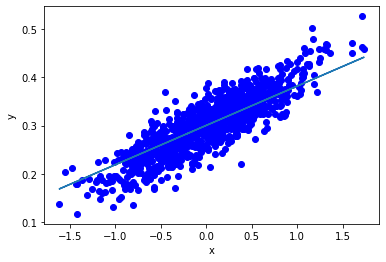

In [18]:
# 초기화
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)


# 알고리즘 실행
for step in range(8):
    sess.run(train)
    print(sess.run(W), sess.run(b))
    plt.plot(x_data, y_data, 'bo')
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()
